# I-Enhance Super Resolution


## Install ISR 
#### Reference Github Repo : https://github.com/idealo/image-super-resolution

In [3]:
!pip install ISR

## Predict 

Load the Image with PIL

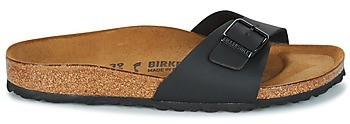

In [7]:
import numpy as np
from PIL import Image

img = Image.open('data/input/test_images/sandal.jpg')
img

## Get Predictions
### Create the model and run Prediction

Create the RDN model, for which we provide pre-trained weights, and load them


In [8]:
from ISR.models import RDN

Using TensorFlow backend.


#### Large RDN Model 

In [9]:
rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_div2k-e086.hdf5')

Instructions for updating:
Colocations handled automatically by placer.


#### Small RDN Model

In [10]:
rdn = RDN(arch_params={'C': 3, 'D':10, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C3-D10-G64-G064-x2_div2k-e134.hdf5')

#### Large RDN noise cancelling, detail enchancing model 

In [11]:
rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_enhanced-e219.hdf5')

#### Run Prediction 

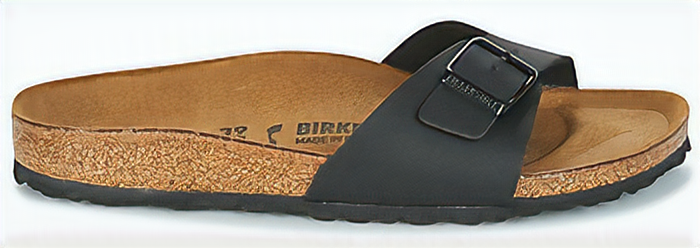

In [12]:
sr_img = rdn.predict(np.array(img))
Image.fromarray(sr_img)

In [16]:
print(np.array(img).shape)
print(sr_img.shape)

(124, 350, 3)
(248, 700, 3)


### Usecase - upscaling Noisy images  

Let's make it harder for the networks.

We compress the image into the jpeg format to introduce compression artefact and lose some information.

We will look at:

A model trained to remove noise using perceptual loss with deep features and GANs training
So let's first compress the image

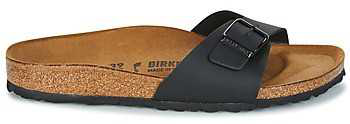

In [17]:
img.save('data/input/test_images/compressed.jpeg','JPEG', dpi=[300, 300], quality=50)
compressed_img = Image.open('data/input/test_images/compressed.jpeg')

compressed_img

39.51464796066284


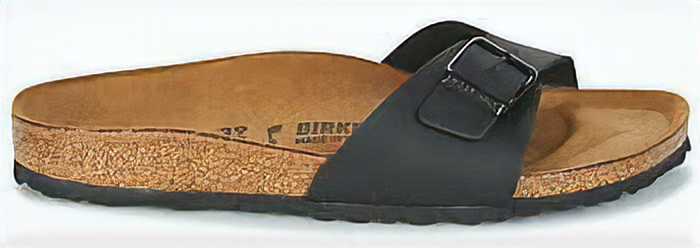

In [19]:
import time

# Checking run-time for single image
start = time.time()
sr_img = rdn.predict(np.array(compressed_img))
print(time.time() - start)
Image.fromarray(sr_img)

### Predictor Class

You can also use the predictor class to run the model on entire folders:


In [ ]:
from ISR.predict import Predictor

!mkdir -p data/output
predictor = Predictor(input_dir='data/input/predictor_test/')
predictor.get_predictions(model=rdn, weights_path='weights/rdn-C6-D20-G64-G064-x2_enhanced-e219.hdf5')

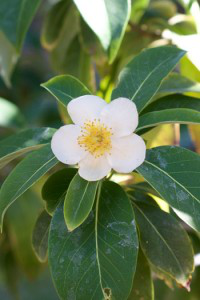

In [30]:
img = Image.open('data/input/predictor_test/Schima_flower_essence-200x300.jpg')
img

In [29]:
sr_img = rdn.predict(np.array(img))

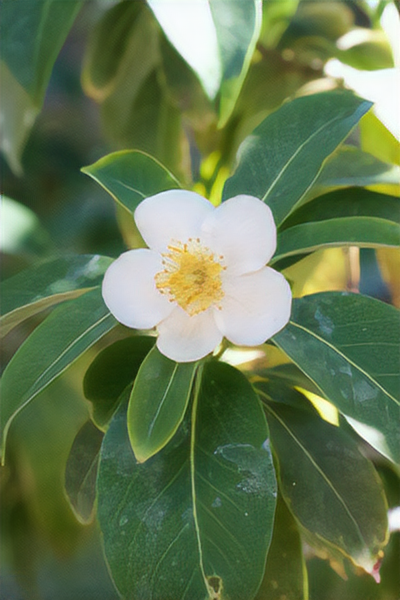

In [31]:
Image.fromarray(sr_img)

In [32]:
print('Original Dimension : {} , Output Dimension : {}'.format(np.array(img).shape, sr_img.shape))

Original Dimension : (300, 200, 3) , Output Dimension : (600, 400, 3)


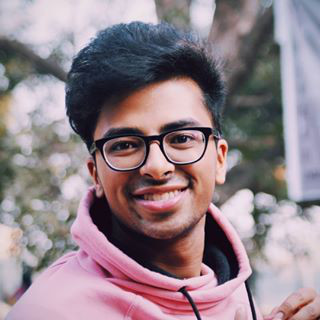

In [33]:
img = Image.open('data/input/predictor_test/sohom.jpg')
img

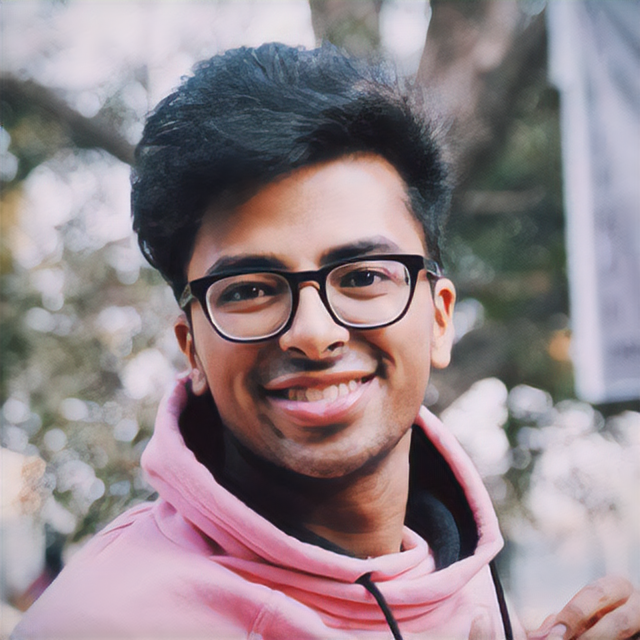

In [34]:
sr_img = rdn.predict(np.array(img))
Image.fromarray(sr_img)

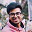

In [35]:
img = Image.open('data/input/predictor_test/sohom_small.jpg')
img

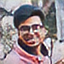

In [36]:
sr_img = rdn.predict(np.array(img))
Image.fromarray(sr_img)

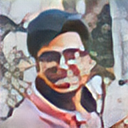

In [37]:
sr2_img = rdn.predict(np.array(sr_img))
Image.fromarray(sr2_img)

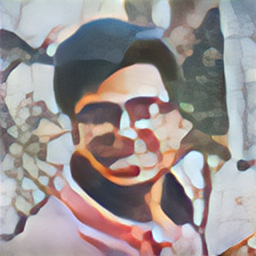

In [39]:
sr3_img = rdn.predict(np.array(sr2_img))
Image.fromarray(sr3_img)